In [1]:
from SZR_contact_tracing import exec
from utility import plt_lattice

In [2]:
lattice_szr=exec(2048,0,alpha=0.437,mszr=False,occupancy=1)

 43%|████▎     | 3603049/8388608 [00:39<00:52, 90731.56it/s] 

max S, Z buf sizes: 2007 1542
Time elapsed: 3562.0546064877967


In [3]:
lattice_mszr=exec(2048,0,alpha=0.253,mszr=True,occupancy=1)

 38%|███▊      | 3165805/8388608 [00:25<00:42, 122750.90it/s]

max S, Z buf sizes: 1391 1019
Time elapsed: 7373.7979961050905


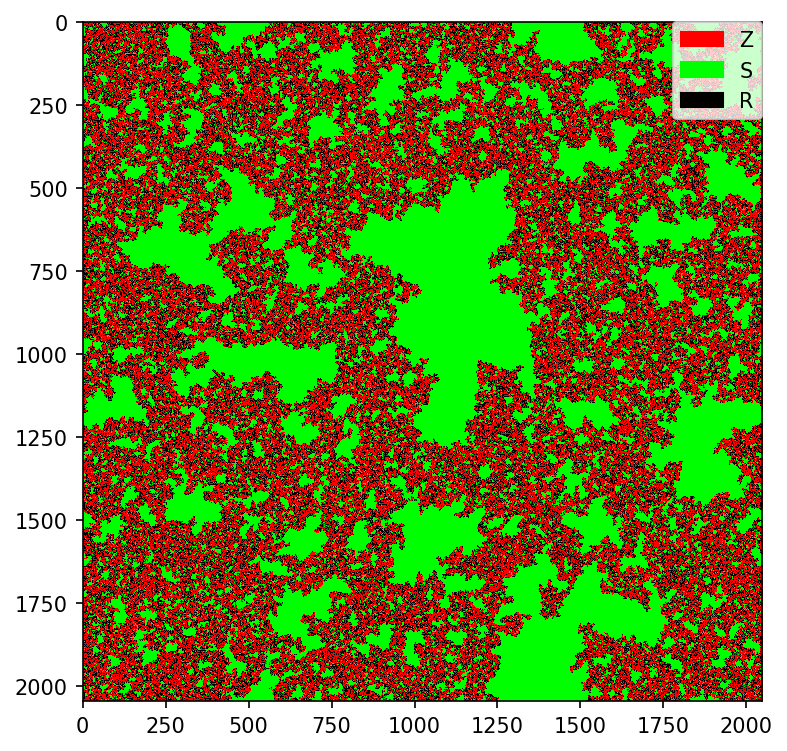

In [4]:
plt_lattice(lattice_szr,path='Z:/SZR.pdf')

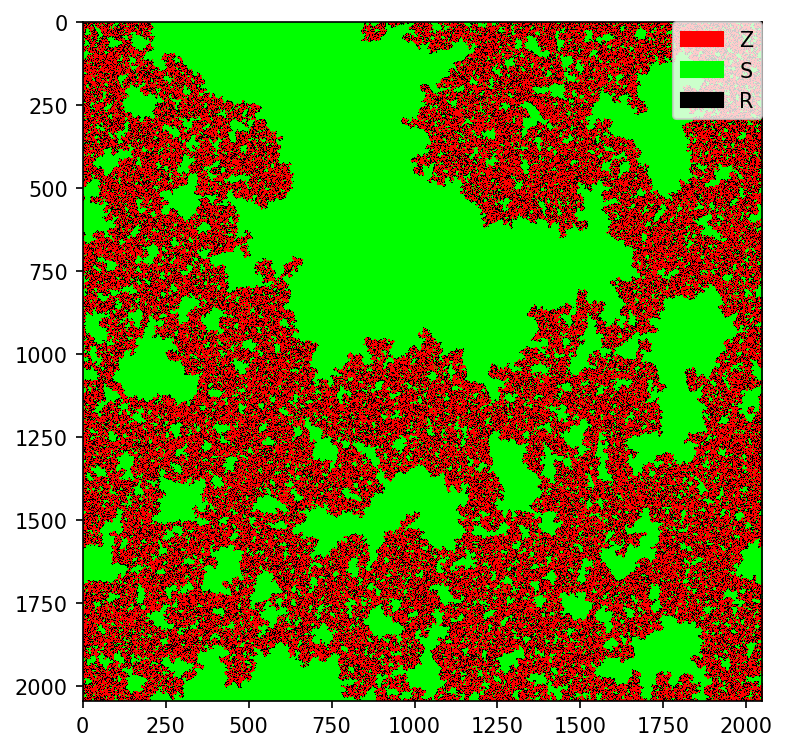

In [5]:
plt_lattice(lattice_mszr,path='Z:/MSZR.pdf')

In [6]:
lattice_szr2=exec(1024,4,alpha=0.65,mszr=False,occupancy=2)

 62%|██████▏   | 2608918/4194304 [00:33<00:20, 78932.98it/s] 

max S, Z buf sizes: 4011 2892
Time elapsed: 632.8608691570752


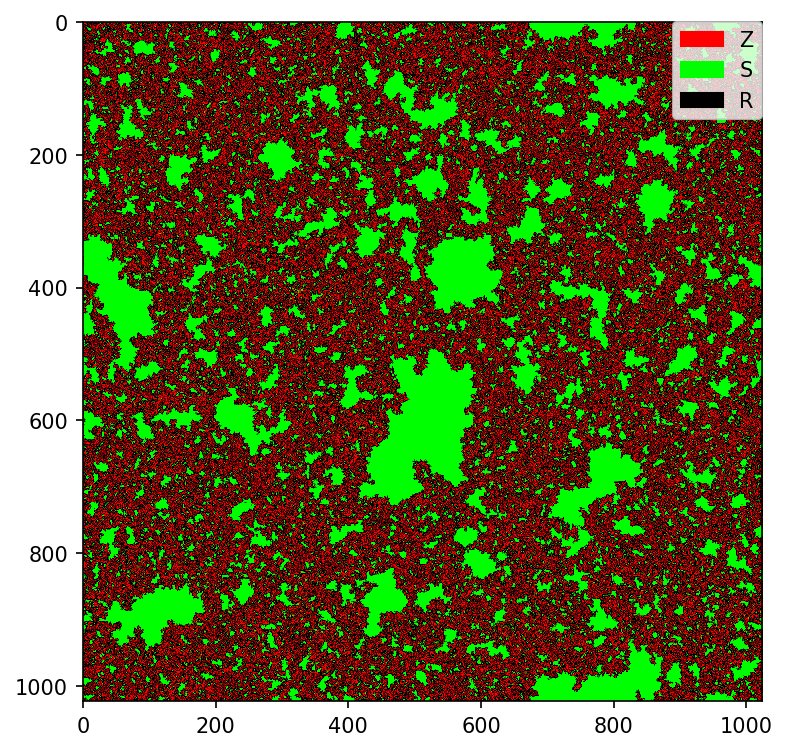

In [7]:
plt_lattice(lattice_szr2,path='Z:/SZRx2.pdf')

In [8]:
lattice_mszr2=exec(1024,0,alpha=0.32,mszr=True,occupancy=2)

 47%|████▋     | 1957984/4194304 [00:15<00:17, 128317.99it/s]

max S, Z buf sizes: 1091 769
Time elapsed: 4476.06973044114


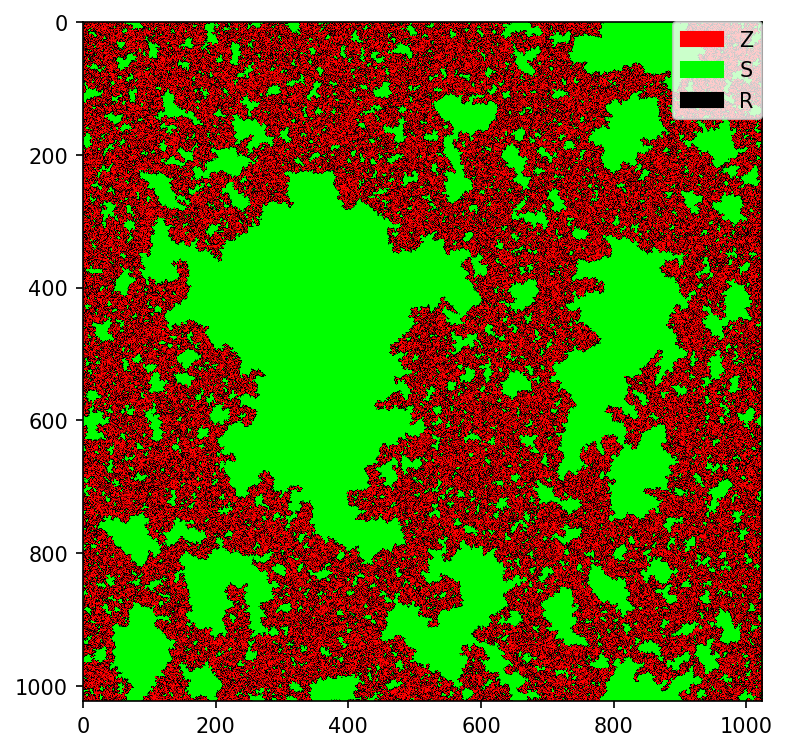

In [9]:
plt_lattice(lattice_mszr2,path='Z:/MSZRx2.pdf')

In [10]:
lattice_szr3=exec(1024,0,alpha=0.758,mszr=False,occupancy=3)

 63%|██████▎   | 3936144/6291456 [00:45<00:27, 86701.77it/s] 

max S, Z buf sizes: 3315 2315
Time elapsed: 543.8862675452965


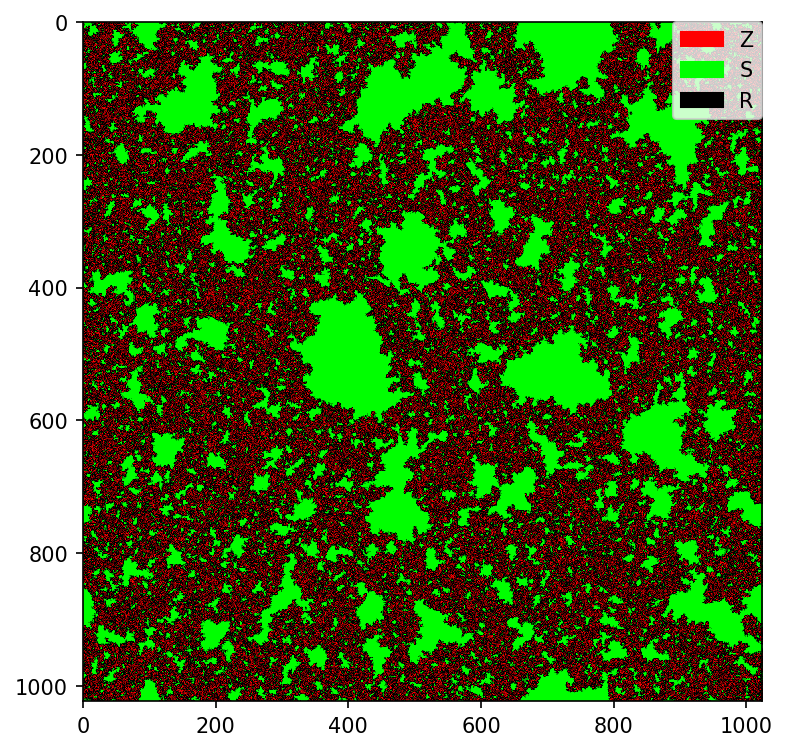

In [11]:
plt_lattice(lattice_szr3,path='Z:/SZRx3.pdf')

In [12]:
lattice_mszr3=exec(1024,1,alpha=0.347,mszr=True,occupancy=3)

 54%|█████▍    | 3425026/6291456 [00:27<00:23, 124380.67it/s]

max S, Z buf sizes: 1735 1236
Time elapsed: 4116.25186560902


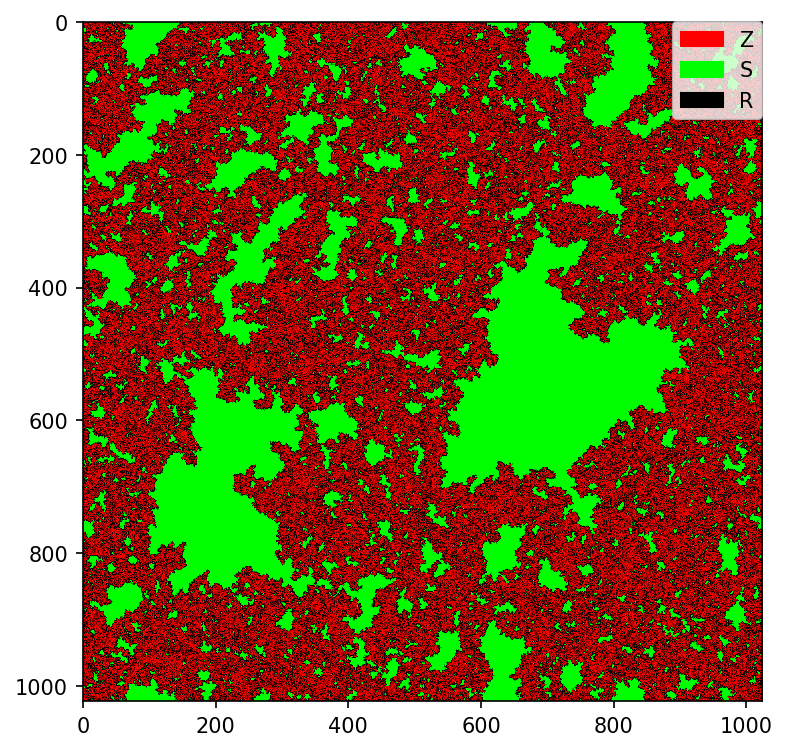

In [13]:
plt_lattice(lattice_mszr3,path='Z:/MSZRx3.pdf')

In [14]:
lattice_szr4=exec(1024,0,alpha=0.812,mszr=False,occupancy=4)

 49%|████▉     | 4137175/8388608 [00:41<00:42, 100758.84it/s]

max S, Z buf sizes: 2249 1547
Time elapsed: 563.2185356704775


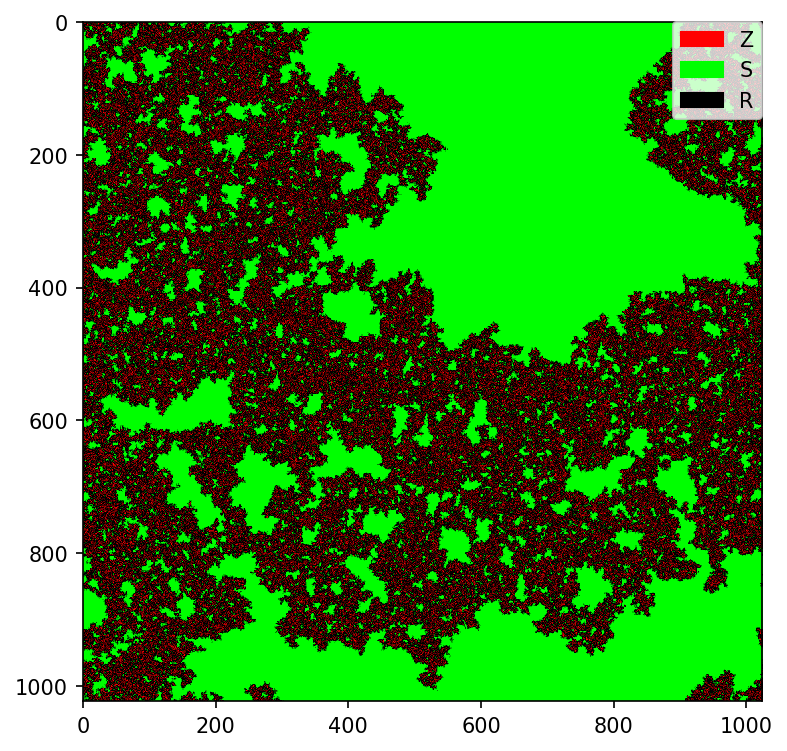

In [15]:
plt_lattice(lattice_szr4,path='Z:/SZRx4.pdf')

In [16]:
lattice_mszr4=exec(1024,0,alpha=0.374,mszr=True,occupancy=4)

 34%|███▎      | 2816637/8388608 [00:20<00:41, 134937.81it/s]

max S, Z buf sizes: 1141 867
Time elapsed: 5926.712670067526


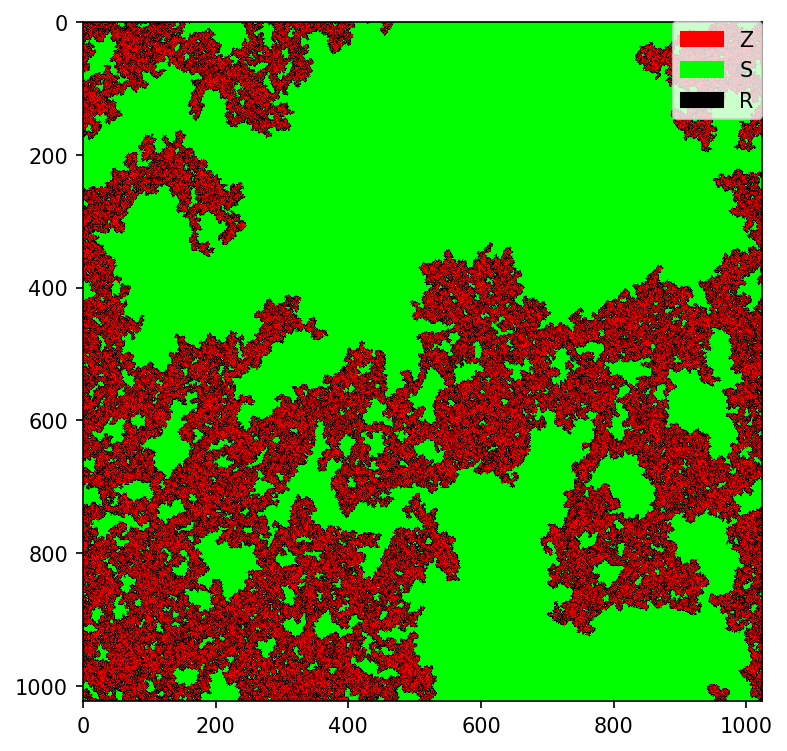

In [17]:
plt_lattice(lattice_mszr4,path='Z:/MSZRx4.pdf')

In [18]:
lattice_mszr10=exec(512,8524,alpha=0.451,mszr=True,occupancy=10)

 23%|██▎       | 1200458/5242880 [00:08<00:27, 149059.53it/s]

max S, Z buf sizes: 259 211
Time elapsed: 12569.154682598137


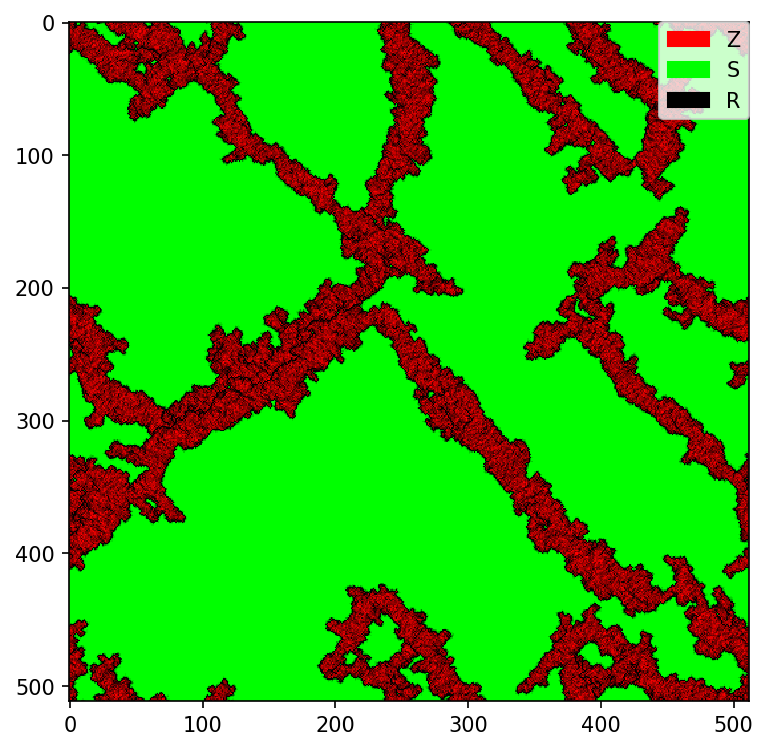

In [19]:
plt_lattice(lattice_mszr10,path='Z:/MSZRx10.pdf')

In [20]:
lattice_mszr100=exec(512,1,alpha=0.46,mszr=True,occupancy=100)

 37%|███▋      | 19192925/52428800 [02:08<03:42, 149571.75it/s]

max S, Z buf sizes: 642 615
Time elapsed: 129386.46770196715


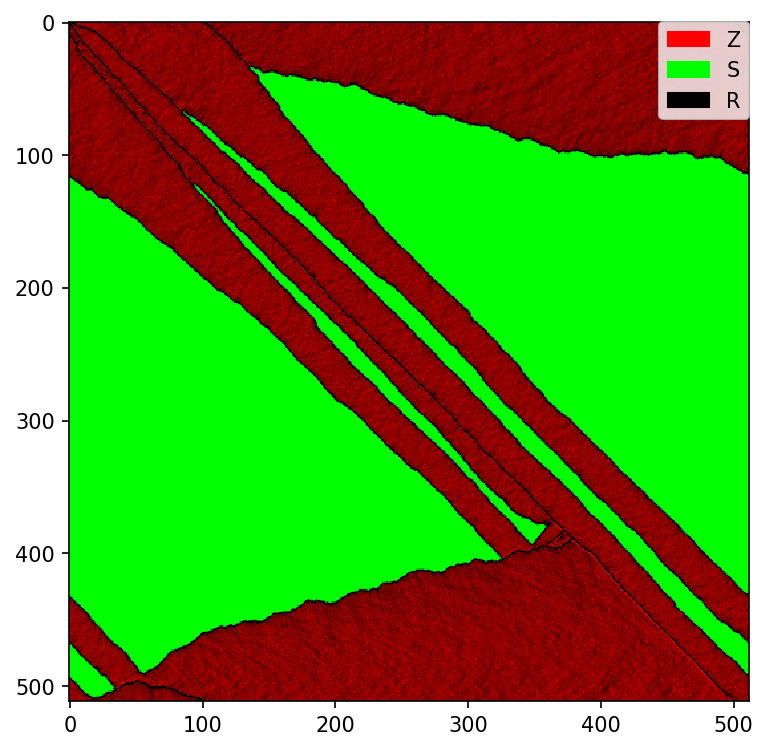

In [21]:
plt_lattice(lattice_mszr100)

In [29]:
# Unused code for video export
# Begin unused code
from SZR_contact_tracing import nb_seed,update_cell,mszr_sample,szr_sample
import numpy as np
from tqdm import trange
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import patches as mpatches

def gen_image(L: int, seed: int, alpha: float = 0.25, mszr: bool = True, occupancy: int = 1, frame_distance: int = 5):
    # Image generator for video export.
    nb_seed(seed)
    lattice = np.zeros((L, L, 3), dtype=np.uint16)
    lattice[:, :, 0] = occupancy
    s_buf64 = np.zeros((L*10*occupancy), dtype=np.uint64)
    z_buf64 = np.zeros((L*10*occupancy), dtype=np.uint64)
    s_buf16 = np.frombuffer(s_buf64, dtype=np.uint16).reshape(-1, 4)
    z_buf16 = np.frombuffer(z_buf64, dtype=np.uint16).reshape(-1, 4)
    update_cell(lattice, np.uint16(0), np.uint16(0), np.uint16(-occupancy),
                np.uint16(occupancy), np.uint16(0), s_buf64, z_buf64)
    lattice_fig = np.empty_like(lattice, dtype=np.float32)
    th = np.max(lattice)
    T = 0.
    T0 = 0
    if mszr:
        sample = mszr_sample
    else:
        sample = szr_sample

    for i in trange(np.sum(lattice[:, :, :2])*2):
        if T >= T0:
            T0+=frame_distance
            lattice_fig[:, :, 0] = lattice[:, :, 1]
            lattice_fig[:, :, 1] = lattice[:, :, 0]
            lattice_fig[:, :, 2] = lattice[:, :, 2]
            yield lattice_fig/th,T
        if s_buf64[0] != 0 and z_buf64[0] != 0:
            x, y, (ds, dz, dr), dt = sample(lattice, s_buf16, z_buf16, alpha)
            T += dt
            update_cell(lattice, x, y, ds, dz, dr, s_buf64, z_buf64)
        else:
            assert z_buf64[0] == 0 and s_buf64[0] == 0
            break


In [30]:
def updatefig(lattice_T):
    # Utility function for video export
    lattice,T=lattice_T
    global ann
    ann.set_text('T:{:.5f}'.format(T))
    im=plt.imshow(lattice)
    return im,

In [31]:
fig=plt.figure(figsize=(6,6),dpi=150)
ann=plt.annotate("T:0.00000",xy=(0.01, 0.966),xycoords='axes fraction',bbox=dict(boxstyle='round', facecolor='white', alpha=0.7,linewidth=0.1),)
patches = [mpatches.Patch(color=(1, 0, 0), label="Z"),
            mpatches.Patch(color=(0, 1, 0), label="S"),
            mpatches.Patch(color=(0, 0, 1), label="R")
            ]
plt.legend(handles=patches)
frames=gen_image(256,1,alpha=0.45,mszr=True,occupancy=100,frame_distance=50)
ani = animation.FuncAnimation(fig, updatefig, blit=True, frames=frames, save_count=99999)
ani.save('Z:/256x100.mp4', fps=60, extra_args=['-vcodec', 'libx264'])

  0%|          | 0/13107200 [00:00<?, ?it/s]

  0%|          | 0/5242880 [00:00<?, ?it/s]

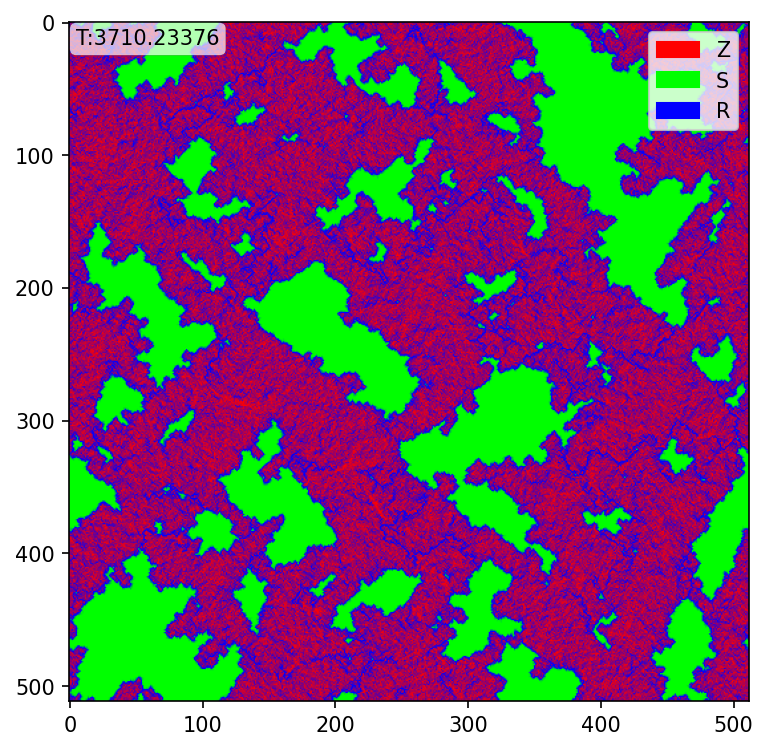

In [35]:
fig=plt.figure(figsize=(6,6),dpi=150)
ann=plt.annotate("T:0.00000",xy=(0.01, 0.966),xycoords='axes fraction',bbox=dict(boxstyle='round', facecolor='white', alpha=0.7,linewidth=0.1),)
patches = [mpatches.Patch(color=(1, 0, 0), label="Z"),
            mpatches.Patch(color=(0, 1, 0), label="S"),
            mpatches.Patch(color=(0, 0, 1), label="R")
            ]
plt.legend(handles=patches)
frames=gen_image(512,1,alpha=0.41,mszr=True,occupancy=10,frame_distance=10)
ani = animation.FuncAnimation(fig, updatefig, blit=True, frames=frames, save_count=99999)
ani.save('Z:/512x10.mp4', fps=60, extra_args=['-vcodec', 'libx264'])

In [ ]:
# End unused code

$$

$$\sigma_{n_{\ge s}}^2=N\cdot p\cdot q=n_{\ge s}\cdot(N-n_{\ge s})/N$$
$$\sigma_p^2=n_{\ge s}\cdot(N-n_{\ge s})/N^3$$
$$\sigma_y^2=\sigma_{p\cdot s^{2-\tau}}^2=n_{\ge s}\cdot(N-n_{\ge s})/N^3\cdot s^{2\cdot(2-\tau)}\propto n_{\ge s}\cdot(N-n_{\ge s})\cdot s^{2\cdot(2-\tau)}$$

$$w\propto 1/w\propto \frac{s^{\tau-2}}{\sqrt{n_{\ge s}\cdot(N-n_{\ge s})}}

In [25]:
from cluster import alpha_search
from utility import plt_critical
from matplotlib import pyplot as plt

[0.00000,0.10000]
0.05 -0.002242307652380145
[0.00000,0.05000]
0.025 -0.020008494972648016
[0.00000,0.02500]
0.0125 -0.003936087486535908
[0.00000,0.01250]
0.00625 0.0036916545081048992
[0.00625,0.01250]
0.009375000000000001 0.0013380283704819307
[0.00938,0.01250]
0.010937500000000001 0.001855088220665448
[0.01094,0.02500]
0.017968750000000002 -0.010468782530594228
[0.01094,0.01797]
0.014453125 -0.0015357996985805801
[0.01094,0.01445]
0.0126953125 -0.004705275668112674
[0.00938,0.01270]
0.01103515625 0.00017044599230722193
found α=0.01104±0.00166
Wall time: 5min 26s


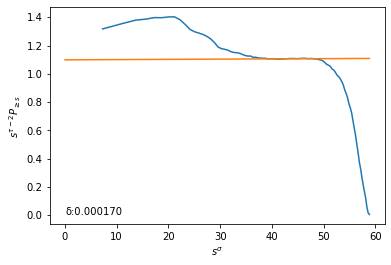

In [23]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0,0.1,0.6,batch=1024,mszr=False,max_step=20)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 1.86902344e-08, -8.24848825e-07],
       [-8.24848825e-07,  3.65276931e-05]])

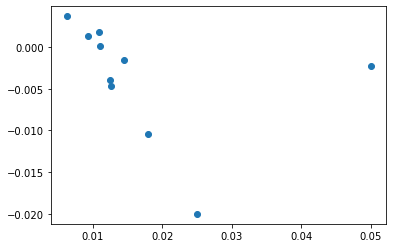

In [26]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.10000,0.40000]
0.25 -0.004308603711097869
[0.10000,0.25000]
0.175 0.004384864471602964
[0.17500,0.25000]
0.2125 -0.016406152161551873
[0.17500,0.21250]
0.19374999999999998 0.001990118065206353
[0.19375,0.21250]
0.203125 -0.006469517540792732
[0.19375,0.20312]
0.1984375 -0.0012311760751508138
[0.19375,0.19844]
0.19609374999999998 0.0006952320590801768
[0.19609,0.19844]
0.197265625 1.1577359916601686e-05
found α=0.19727±0.00117
Wall time: 6min 5s


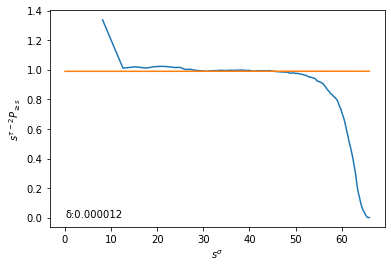

In [27]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.1,0.4,0.743656365691809,batch=1024,mszr=False,max_step=20)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 8.35206111e-10, -3.00626015e-08],
       [-3.00626015e-08,  1.10288651e-06]])

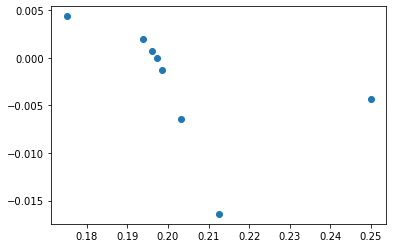

In [28]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.42000,0.45000]
0.435 0.0006996603042466836
[0.43500,0.45000]
0.4425 -0.0044040049461202165
[0.43500,0.44250]
0.43875 -0.00028758486671573056
[0.43500,0.43875]
0.436875 -0.00012299883755313425
[0.43500,0.43688]
0.4359375 0.00015143777294938913
[0.43594,0.43688]
0.43640625 0.0003782066334830442
[0.43641,0.43875]
0.437578125 -0.00037062293716969615
[0.43641,0.43758]
0.4369921875 -7.620065710052332e-05
found α=0.43699±0.00059
Wall time: 6min 50s


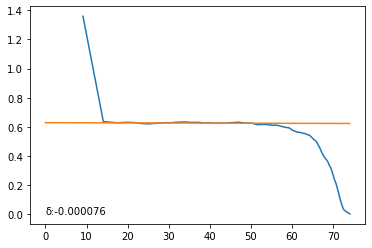

In [18]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.42,0.45,1,batch=1024,mszr=False)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 1.12566050e-09, -4.27620910e-08],
       [-4.27620910e-08,  1.66712181e-06]])

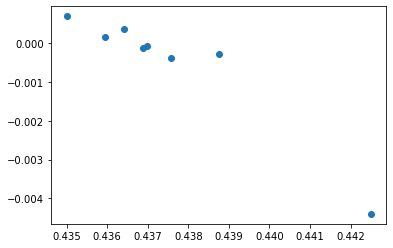

In [19]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.43000,0.55000]
0.49 -0.0012962097215539314
[0.43000,0.49000]
0.45999999999999996 0.0033630684455053152
[0.46000,0.49000]
0.475 0.0033485642196390813
[0.47500,0.49000]
0.4825 0.00272297202412905
[0.48250,0.49000]
0.48624999999999996 0.0019752957381937554
[0.48625,0.49000]
0.488125 0.0006337240421948709
[0.48812,0.49000]
0.48906249999999996 0.0010120230271288984
[0.48906,0.55000]
0.51953125 -0.004462313618320593
[0.48906,0.51953]
0.504296875 -0.007972888184768991
[0.48812,0.50430]
0.4962109375 -0.003973510490991049
[0.48812,0.49621]
0.49216796875 -0.0008226740228485836
[0.48812,0.49217]
0.49014648437499997 0.00018834767546083167
[0.49015,0.49217]
0.4911572265625 0.000930179681467397
[0.49116,0.49621]
0.49368408203125 -0.0018650224367891646
[0.49116,0.49368]
0.492420654296875 -0.0009037734125996864
[0.49116,0.49242]
0.49178894042968746 -9.085972085192017e-05
found α=0.49179±0.00063
Wall time: 23min 45s


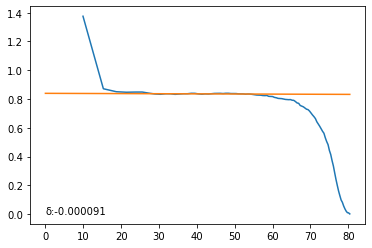

In [156]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.43,0.55,1.25,batch=1024,mszr=False)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 3.44500165e-09, -1.52992201e-07],
       [-1.52992201e-07,  6.87470500e-06]])

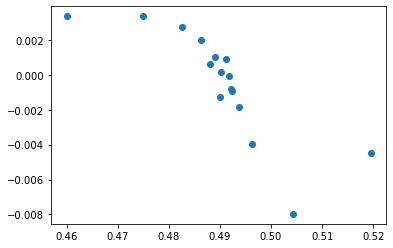

In [157]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.43000,0.66000]
0.545 0.0004764657795537639
[0.54500,0.66000]
0.6025 -0.008048508850362221
[0.54500,0.60250]
0.57375 -0.015082619517800759
[0.43000,0.57375]
0.501875 0.003022035566527204
[0.50187,0.57375]
0.5378125 0.001990349621788604
[0.53781,0.57375]
0.55578125 -0.0064642282543240955
[0.53781,0.55578]
0.5467968750000001 0.00027836551187242903
[0.54680,0.55578]
0.5512890625 -0.0013498107445769699
[0.54680,0.55129]
0.54904296875 -0.001015886750752266
[0.54680,0.54904]
0.547919921875 -0.0006675494455841483
[0.54680,0.54792]
0.5473583984375001 -0.00034260373290817694
[0.54680,0.54736]
0.5470776367187501 -0.0003479850164790699
[0.53781,0.54708]
0.5424450683593751 0.0016020500562468256
[0.54245,0.54708]
0.5447613525390627 0.000844150489052654
[0.54476,0.54708]
0.5459194946289063 0.00012341789792965648
found α=0.54592±0.00116
Wall time: 25min 12s


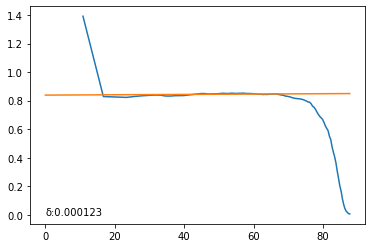

In [151]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.43,0.66,1.5,batch=1024,mszr=False)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 2.69090185e-09, -1.45275458e-07],
       [-1.45275458e-07,  8.06927435e-06]])

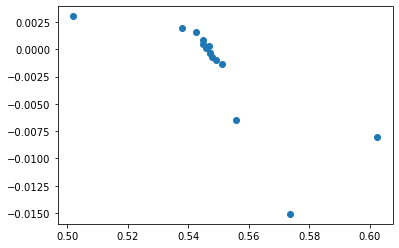

In [152]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.55000,0.66000]
0.605 0.0005398808851563997
[0.60500,0.66000]
0.6325000000000001 -0.008492099760687027
[0.60500,0.63250]
0.61875 -0.006408826059531763
[0.60500,0.61875]
0.611875 -0.0029640811757686634
[0.60500,0.61187]
0.6084375 -0.00045334114352482116
[0.60500,0.60844]
0.60671875 -0.00020842542878285
[0.60500,0.60672]
0.605859375 0.00046173320121191
[0.60586,0.60672]
0.6062890624999999 -0.0004541341110223569
[0.60586,0.60629]
0.6060742187499999 0.0004071264623302839
[0.60607,0.60629]
0.6061816406249999 -2.557682853306057e-05
found α=0.60618±0.00011
Wall time: 15min 48s


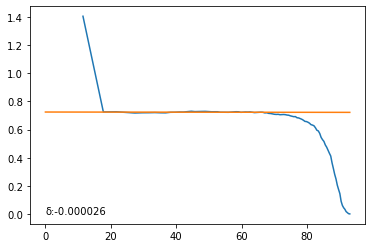

In [158]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.55,0.66,1.75,batch=1024,mszr=False)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 1.41107612e-09, -7.92956859e-08],
       [-7.92956859e-08,  4.56917252e-06]])

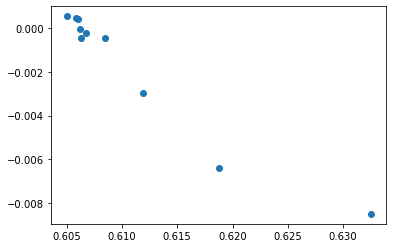

In [159]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.63000,0.68000]
0.655 0.0014056782063040544
[0.65500,0.68000]
0.6675 -0.0028058850361024016
[0.65500,0.66750]
0.66125 -0.00046770498597759606
[0.65500,0.66125]
0.6581250000000001 0.0009232101636512651
[0.65813,0.66125]
0.6596875 0.00032688054878777736
[0.65969,0.66125]
0.6604687499999999 0.0003093763646945962
[0.66047,0.66125]
0.660859375 -0.00025467069295854723
[0.66047,0.66086]
0.6606640625 -0.0004409222862863165
[0.65969,0.66066]
0.66017578125 0.00014242745124131616
[0.66018,0.66066]
0.660419921875 0.00016272646568191051
[0.66042,0.66086]
0.6606396484375 -0.00021306616074407637
[0.66042,0.66064]
0.6605297851562499 -2.74373555160322e-06
found α=0.66053±0.00011
Wall time: 23min 17s


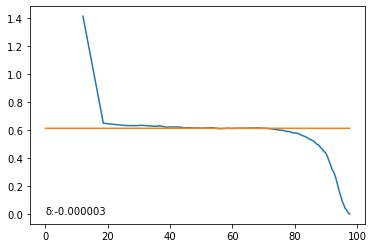

In [20]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.63,0.68,2,batch=1024,mszr=False)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 1.68393614e-09, -1.04106651e-07],
       [-1.04106651e-07,  6.49739357e-06]])

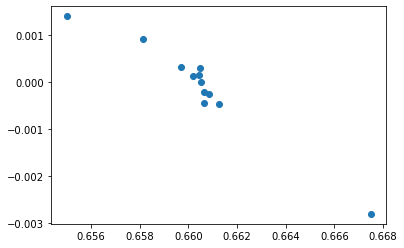

In [21]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.66000,0.76000]
0.71 -0.0084935776727173
[0.66000,0.71000]
0.685 0.0015229609325068344
[0.68500,0.71000]
0.6975 -0.0039666183959846816
[0.68500,0.69750]
0.69125 -0.0003625929793567462
[0.68500,0.69125]
0.6881250000000001 0.00022868773856252978
[0.68813,0.69125]
0.6896875 0.0006961385181522904
[0.68969,0.69750]
0.69359375 -0.0015700180537717141
[0.68969,0.69359]
0.691640625 -0.00020395845093014851
[0.68969,0.69164]
0.6906640625 -0.0005704928813179025
[0.68813,0.69066]
0.68939453125 0.0007842724565719041
[0.68939,0.69066]
0.690029296875 0.00011336103741376927
[0.69003,0.69066]
0.6903466796875 0.0005123162253037278
[0.69035,0.69164]
0.69099365234375 -0.0007363500327461002
[0.69035,0.69099]
0.6906701660156249 -0.0009790825206576655
[0.69003,0.69067]
0.6903497314453124 0.0005160325481260262
[0.69035,0.69067]
0.6905099487304687 -0.0007913163092080432
[0.69035,0.69051]
0.6904298400878905 -0.0003705415717936466
[0.69035,0.69043]
0.6903897857666015 0.00034773257241984764
[0.69039,0.69043]
0.6

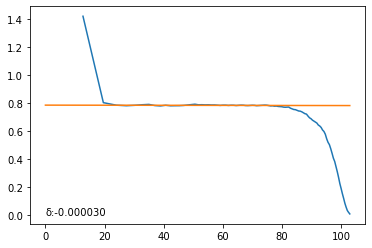

In [82]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.66,0.76,2.3,batch=1024,mszr=False)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 8.43613996e-10, -5.23472013e-08],
       [-5.23472013e-08,  3.34505705e-06]])

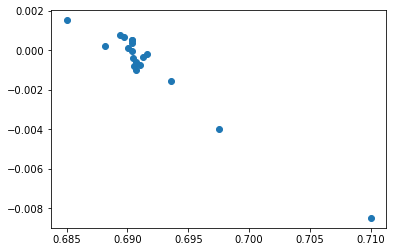

In [83]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.66000,0.76000]
0.71 0.0014216386833362312
[0.71000,0.76000]
0.735 -0.008834456558096908
[0.71000,0.73500]
0.7224999999999999 -0.0011996440985928773
[0.71000,0.72250]
0.7162499999999999 0.0012065506939920856
[0.71625,0.72250]
0.7193749999999999 0.00046846579415977385
[0.71937,0.72250]
0.7209374999999999 3.839714050038698e-05
found α=0.72094±0.00156
Wall time: 18min 16s


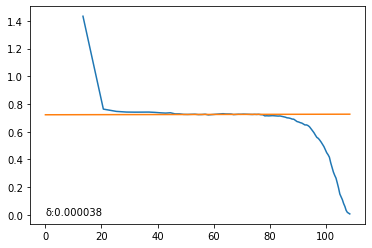

In [84]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.66,0.76,2.6,batch=1024,mszr=False)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 1.95209712e-09, -1.26577162e-07],
       [-1.26577162e-07,  8.28422184e-06]])

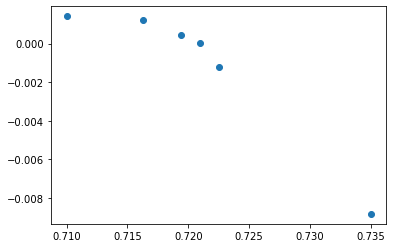

In [85]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.70000,0.80000]
0.75 0.001606083156878212
[0.75000,0.80000]
0.775 -0.006605684365993334
[0.75000,0.77500]
0.7625 -0.002067272091943638
[0.75000,0.76250]
0.75625 0.0007285323378926705
[0.75625,0.76250]
0.7593749999999999 6.106329620151002e-05
[0.75937,0.76250]
0.7609374999999999 -0.0013616131351418103
[0.75937,0.76094]
0.7601562499999999 -0.0014348247366929442
[0.75625,0.76016]
0.7582031249999999 5.5185164107353365e-05
found α=0.75820±0.00195
Wall time: 23min 4s


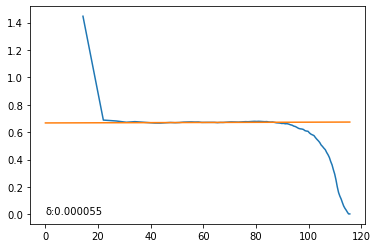

In [22]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.7,0.8,3,batch=1024,mszr=False)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 7.15949677e-10, -4.53092429e-08],
       [-4.53092429e-08,  2.90260000e-06]])

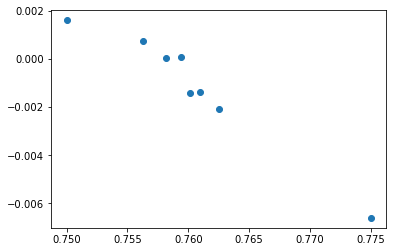

In [23]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.75000,1.00000]
0.875 -0.005761788659891029
[0.75000,0.87500]
0.8125 -0.0005826423879641955
[0.75000,0.81250]
0.78125 0.001853297506775455
[0.78125,0.81250]
0.796875 0.0016437285970989414
[0.79688,0.81250]
0.8046875 0.0015223156395362935
[0.80469,0.81250]
0.80859375 0.0010382777989120255
[0.80859,0.81250]
0.810546875 0.000490780372563444
[0.81055,0.81250]
0.8115234375 -0.0003156101255916429
[0.81055,0.81152]
0.81103515625 0.0006060383812048862
[0.81104,0.81152]
0.811279296875 0.00040214584863172877
[0.81128,0.81152]
0.8114013671875 0.00034414476850014514
[0.81140,0.81152]
0.81146240234375 0.0004429947276424974
[0.81146,0.81250]
0.811981201171875 0.000471766587376963
[0.81198,0.81250]
0.8122406005859375 0.0003585518891174308
[0.81224,0.81250]
0.8123703002929688 -5.505483039317346e-05
[0.81224,0.81237]
0.8123054504394531 -0.00026125388833546446
[0.81198,0.81231]
0.8121433258056641 0.00018677214833390186
[0.81214,0.81231]
0.8122243881225586 -4.597793978182771e-05
found α=0.81222±0.00008

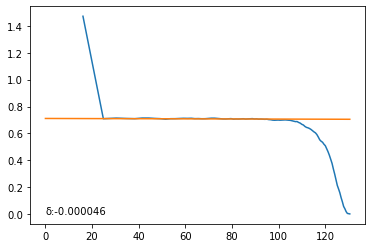

In [24]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.75,1,4,batch=1024,mszr=False)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

In [ ]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.75,1,4,batch=1024,mszr=False)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 4.34279145e-10, -4.51791617e-08],
       [-4.51791617e-08,  4.80556074e-06]])

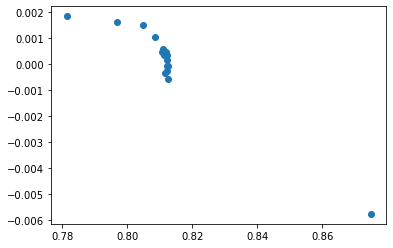

In [80]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

array([[ 6.04021625e-10, -5.36423627e-08],
       [-5.36423627e-08,  4.86729443e-06]])

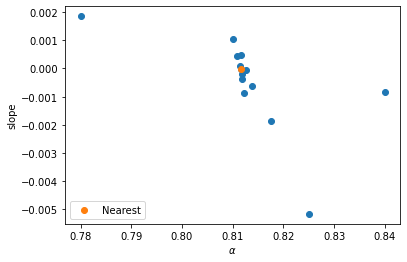

In [59]:
plt.axes(ylabel='slope',xlabel='$\\alpha$')
plt.scatter(his[:,0],his[:,1])
plt.scatter(his[-1,0],his[-1,1],label='Nearest')
#plt.xlim(0.8102,0.813)
#plt.ylim(-0.001,0.001)
plt.legend(loc='lower left')
plt.draw()
cov

[0.75000,1.00000]
0.875 -0.0026514614998875917
[0.75000,0.87500]
0.8125 0.0017775648483621725
[0.81250,0.87500]
0.84375 0.000993334308418206
[0.84375,0.87500]
0.859375 -0.005740847213030785
[0.84375,0.85938]
0.8515625 -0.002367105912197861
[0.84375,0.85156]
0.84765625 -0.00016280327271030244
[0.84375,0.84766]
0.845703125 0.00047514990065371574
[0.84570,0.84766]
0.8466796875 0.00013140482117122174
[0.84668,0.84766]
0.84716796875 -1.0704052030815906e-05
found α=0.84717±0.00049
Wall time: 50min 22s


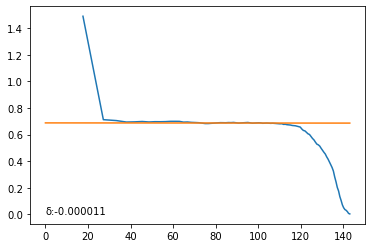

In [55]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.75,1,5,batch=1024,mszr=False)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 9.74575742e-10, -8.93258162e-08],
       [-8.93258162e-08,  8.26827298e-06]])

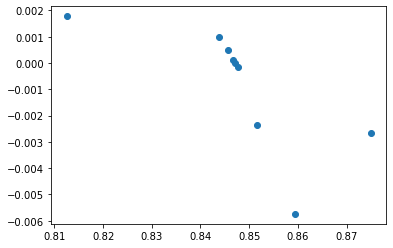

In [56]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.75000,1.00000]
0.875 -0.0022357634573514228
[0.75000,0.87500]
0.8125 0.0018486716810869018
[0.81250,0.87500]
0.84375 0.0016185291680137074
[0.84375,0.87500]
0.859375 0.001383497524692405
[0.85938,0.87500]
0.8671875 0.000599810515577412
[0.86719,0.87500]
0.87109375 0.0004843256481781491
[0.87109,0.87500]
0.873046875 -0.00035322553450867515
[0.87109,0.87305]
0.8720703125 0.00016509341067974675
[0.87207,0.87305]
0.87255859375 -0.0009244922793312049
[0.87207,0.87256]
0.872314453125 -0.0006317782153554777
[0.87207,0.87231]
0.8721923828125 -0.0010503665877937642
[0.87109,0.87219]
0.87164306640625 0.0001435263233909288
[0.87164,0.87219]
0.871917724609375 -0.00018608153128035876
[0.87164,0.87192]
0.8717803955078125 0.00019998893933397563
[0.87178,0.87192]
0.8718490600585938 -0.0005663524616751393
[0.87178,0.87185]
0.8718147277832031 -0.0001610650596349374
[0.87178,0.87181]
0.8717975616455078 -0.0001974468719410217
[0.87164,0.87180]
0.8717203140258789 -0.0003091252108066525
[0.87164,0.87172]

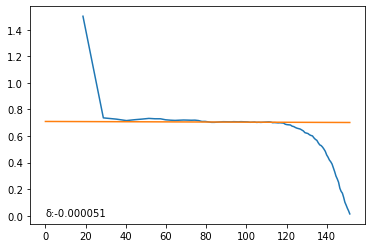

In [57]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.75,1,6,batch=1024,mszr=False)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 5.36803698e-10, -5.33401254e-08],
       [-5.33401254e-08,  5.34652575e-06]])

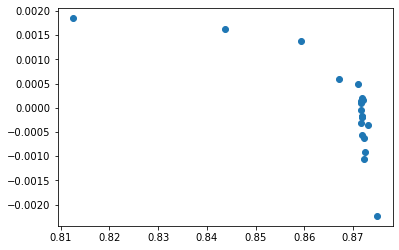

In [58]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.75000,1.00000]
0.875 0.0013635621959685058
[0.87500,1.00000]
0.9375 -0.0028710298347041203
[0.87500,0.93750]
0.90625 -0.002319026311433333
[0.87500,0.90625]
0.890625 -0.001738021991200589
[0.87500,0.89062]
0.8828125 0.0011010486262645516
[0.88281,0.89062]
0.88671875 0.0005825432041553257
[0.88672,0.89062]
0.888671875 -0.00017984035820365862
[0.88672,0.88867]
0.8876953125 0.00041606645081724794
[0.88770,0.88867]
0.88818359375 -9.198860146277654e-05
[0.88770,0.88818]
0.887939453125 0.00013244914993546463
[0.88794,0.88818]
0.8880615234375 -2.739293141452309e-06
found α=0.88806±0.00012
Wall time: 1h 27min 43s


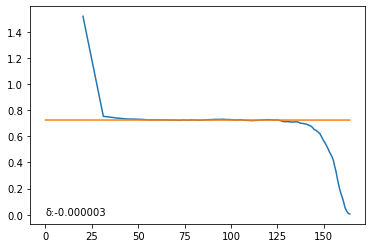

In [59]:
%%time
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.75,1,7,batch=1024,mszr=False)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 4.34279145e-10, -4.51791617e-08],
       [-4.51791617e-08,  4.80556074e-06]])

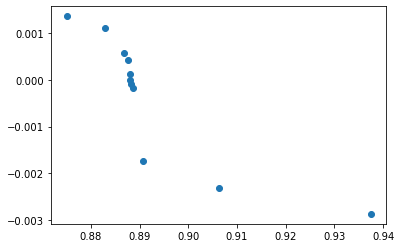

In [60]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.24500,0.26000]
0.2525 0.0001034569237022181
[0.25250,0.26000]
0.25625 -0.0005035477858574336
[0.25250,0.25625]
0.254375 -0.0002969995991689788
[0.25250,0.25438]
0.2534375 -0.00022699425900258297
[0.25250,0.25344]
0.25296874999999996 0.0007638641299165195
[0.25297,0.25344]
0.253203125 -0.00031983174356369057
[0.25297,0.25320]
0.25308593749999997 0.00045029860333112173
[0.25309,0.25320]
0.25314453124999997 -2.396194807094197e-05
found α=0.25314±0.00006


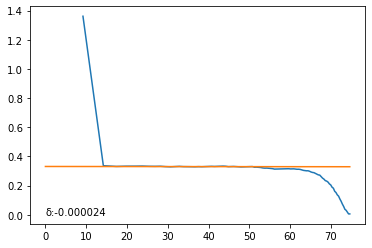

In [26]:
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.245,0.26,1,batch=1024,mszr=True)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 1.36602686e-09, -5.82817897e-08],
       [-5.82817897e-08,  2.53333985e-06]])

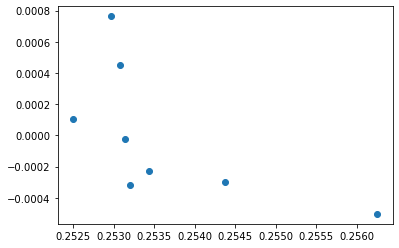

In [27]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.28000,0.36000]
0.32 0.0001608778806284231
[0.32000,0.36000]
0.33999999999999997 -0.0022128867881938893
[0.32000,0.34000]
0.32999999999999996 -0.0034393312102811314
[0.28000,0.33000]
0.305 0.0008991233166922
[0.30500,0.33000]
0.3175 0.0006068662100769853
[0.31750,0.33000]
0.32375 -0.0010990944617329322
[0.31750,0.32375]
0.320625 0.00024134658724516754
[0.32062,0.32375]
0.32218749999999996 -0.0003546603134621125
[0.32062,0.32219]
0.32140625 -0.00012054696459112181
[0.32062,0.32141]
0.321015625 5.399889475512402e-05
[0.32102,0.32141]
0.3212109375 -0.00017532059987836253
[0.32102,0.32121]
0.32111328125000005 -0.00012904434088311756
[0.32102,0.32111]
0.32106445312500004 -0.00015388738038476452
[0.32062,0.32106]
0.3208447265625 -0.0006778807273492073
[0.32062,0.32084]
0.32073486328125 7.306512498729207e-05
[0.32073,0.32084]
0.320789794921875 -0.000956875969641803
[0.32073,0.32079]
0.3207623291015625 -0.0004226332150571777
[0.32073,0.32076]
0.3207485961914063 0.00013164940277143997
[0.3207

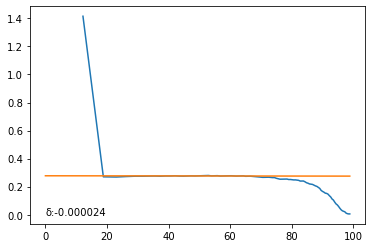

In [28]:
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.28,0.36,2,batch=1024,mszr=True)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 6.57242742e-10, -3.58772940e-08],
       [-3.58772940e-08,  2.00004705e-06]])

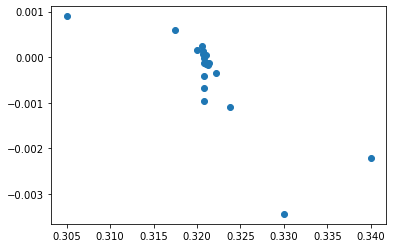

In [29]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.30000,0.40000]
0.35 0.00036062601487993334
[0.35000,0.40000]
0.375 -0.0019603821785359908
[0.35000,0.37500]
0.3625 -0.00220981050630335
[0.30000,0.36250]
0.33125 0.0007641791187955244
[0.33125,0.36250]
0.346875 0.000551519399633033
[0.34687,0.36250]
0.3546875 0.00014515209663324162
[0.35469,0.36250]
0.35859375 -0.002269733137385467
[0.35469,0.35859]
0.356640625 -0.0010589708307099733
[0.35469,0.35664]
0.3556640625 -0.0006436122728263973
[0.35469,0.35566]
0.35517578125 -0.0006977443232786843
[0.34687,0.35518]
0.351025390625 0.000426031839691987
[0.35103,0.35518]
0.3531005859375 -3.659711491249494e-05
found α=0.35310±0.00208


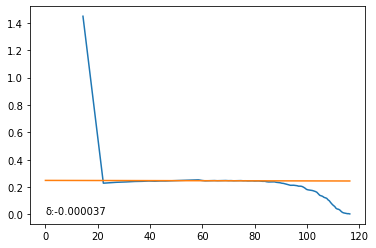

In [30]:
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.32,0.35,3,batch=1024,mszr=True)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 8.62969670e-10, -5.52054677e-08],
       [-5.52054677e-08,  3.66855173e-06]])

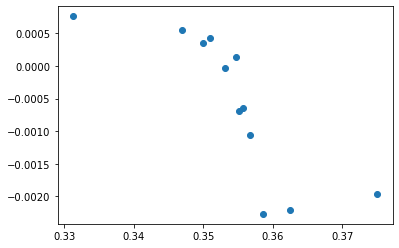

In [31]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.30000,0.50000]
0.4 -0.002460271071208223
[0.30000,0.40000]
0.35 0.0006443894485008159
[0.35000,0.40000]
0.375 4.066627354132003e-05
found α=0.37500±0.02500


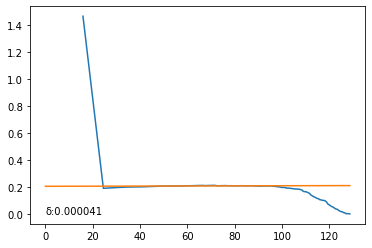

In [32]:
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.3,0.5,4,batch=1024,mszr=True)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 3.66827697e-10, -2.70216903e-08],
       [-2.70216903e-08,  2.07735450e-06]])

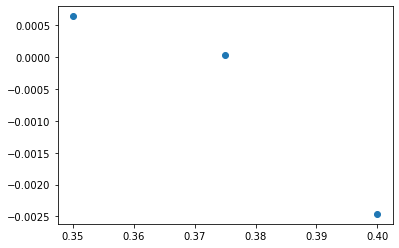

In [33]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.30000,0.50000]
0.4 -0.000924555521486681
[0.30000,0.40000]
0.35 0.0006867970005772899
[0.35000,0.40000]
0.375 0.0004421763609502131
[0.37500,0.40000]
0.3875 0.0003046384200971452
[0.38750,0.40000]
0.39375000000000004 4.703530021914614e-05
[0.39375,0.40000]
0.39687500000000003 -0.0001882391518115936
[0.39375,0.39688]
0.39531250000000007 0.00017646062519381938
[0.39531,0.39688]
0.39609375 -0.00030273345871515675
[0.39531,0.39609]
0.39570312500000004 -7.877391619464473e-05
[0.39531,0.39570]
0.39550781250000006 -4.4784040379154844e-05
found α=0.39551±0.00020


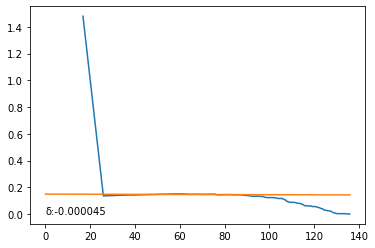

In [34]:
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.3,0.5,5,batch=1024,mszr=True)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 6.32162857e-10, -4.27577729e-08],
       [-4.27577729e-08,  3.01881481e-06]])

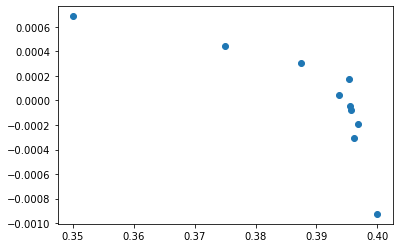

In [35]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.30000,0.50000]
0.4 0.00032624435738944795
[0.40000,0.50000]
0.45 -0.0004266698412793494
[0.40000,0.45000]
0.42500000000000004 -0.0011243207259462576
[0.30000,0.42500]
0.36250000000000004 0.0006097623256346223
[0.36250,0.42500]
0.39375000000000004 0.0003897493813959434
[0.39375,0.42500]
0.40937500000000004 -8.671167323750293e-06
found α=0.40938±0.01562


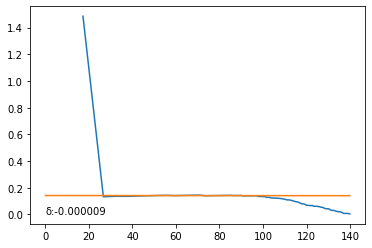

In [36]:
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.3,0.5,6,batch=1024,mszr=True)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 2.78236834e-10, -2.09752990e-08],
       [-2.09752990e-08,  1.64994268e-06]])

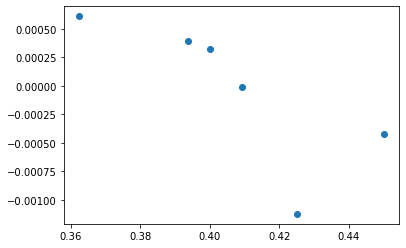

In [37]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.30000,0.50000]
0.4 0.00035007050082872123
[0.40000,0.50000]
0.45 -0.0008267042411776018
[0.40000,0.45000]
0.42500000000000004 0.00011224377388321234
[0.42500,0.45000]
0.4375 -0.00015456641626501516
[0.42500,0.43750]
0.43125 -0.0008160553345436314
[0.40000,0.43125]
0.415625 0.00016364955091647114
[0.41563,0.43125]
0.4234375 9.808848885216789e-05
[0.42344,0.43125]
0.42734375 -0.0005224749268211637
[0.42344,0.42734]
0.425390625 -0.00012796260435557103
[0.42344,0.42539]
0.4244140625 -0.0002041067432080291
[0.41563,0.42441]
0.42001953125 0.00020409701552818495
[0.42002,0.42441]
0.422216796875 0.00024090003738185879
[0.42222,0.42539]
0.4238037109375 -5.560996851728397e-06
found α=0.42380±0.00159


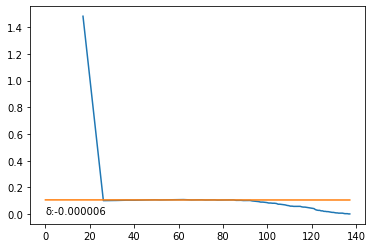

In [38]:
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.3,0.5,7,batch=1024,mszr=True)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 2.02041019e-10, -1.34742983e-08],
       [-1.34742983e-08,  9.33358621e-07]])

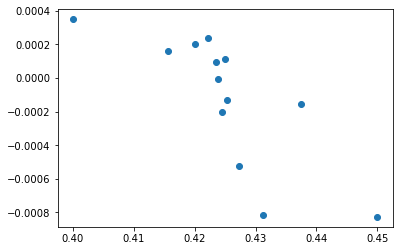

In [39]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.40000,0.50000]
0.45 7.558394218644143e-05
[0.45000,0.50000]
0.475 -0.0003028770266282285
[0.45000,0.47500]
0.4625 -0.0003041555210608874
[0.40000,0.46250]
0.43125 0.00022573513400177918
[0.43125,0.46250]
0.446875 0.00016375311224459422
[0.44688,0.46250]
0.4546875 3.0145320896319998e-05
[0.45469,0.46250]
0.45859375 -0.0006292954555672843
[0.45469,0.45859]
0.456640625 -0.0002770946815208184
[0.45469,0.45664]
0.4556640625 -0.00011255114065376725
[0.45469,0.45566]
0.45517578125 -0.0005396325699128192
[0.44688,0.45518]
0.451025390625 7.968036444029108e-05
[0.45103,0.45518]
0.4531005859375 -8.094756458678363e-06
found α=0.45310±0.00208


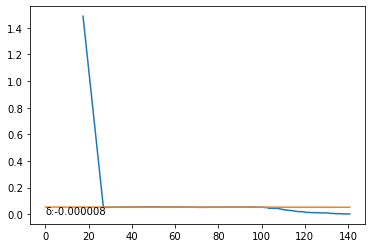

In [196]:
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.4,0.5,10,batch=1024,mszr=True)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 5.40352765e-11, -4.08648516e-09],
       [-4.08648516e-09,  3.28367142e-07]])

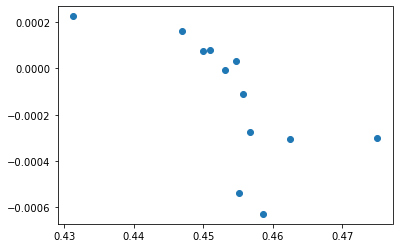

In [197]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

[0.40000,0.50000]
0.45 0.0002472813866760758
[0.45000,0.50000]
0.475 0.00011119143867881207
[0.47500,0.50000]
0.4875 2.934054576698942e-06
found α=0.48750±0.01250


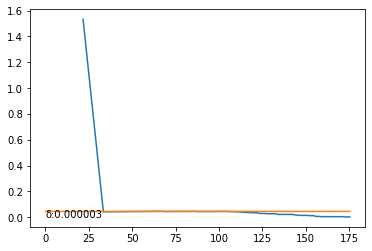

In [198]:
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.4,0.5,20,batch=1024,mszr=True)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

[0.30000,0.50000]
0.4 0.0010773195941229557
[0.40000,0.50000]
0.45 0.0005142758273889242
[0.45000,0.50000]
0.475 0.0002246718428585248
[0.47500,0.50000]
0.4875 7.491894437808413e-05
[0.48750,0.50000]
0.49375 3.0347118407106622e-05
found α=0.49375±0.00625


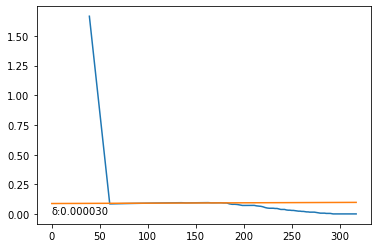

In [179]:
a,a_sigma,f,sizes,his,cov=alpha_search(256,0,0.3,0.5,50,batch=1024,mszr=True)
print("found α={:.5f}±{:.5f}".format(a,a_sigma))
plt_critical(sizes)

array([[ 3.62546528e-10, -4.91130588e-08],
       [-4.91130588e-08,  7.08482712e-06]])

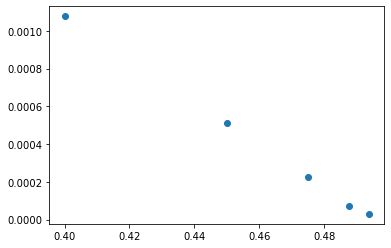

In [180]:
plt.scatter(his[:,0],his[:,1])
plt.draw()
cov

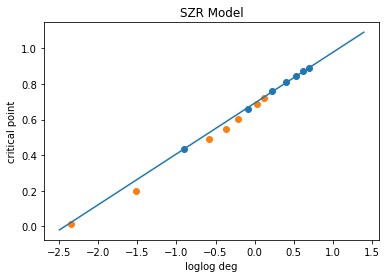

In [148]:
plt.axes(xlabel='loglog deg',ylabel='critical point',title='SZR Model')
x,y=np.log(np.log(np.arange(1,8)+0.5)),[0.43699,0.66053,0.75820,0.8122243881225586,0.84717,0.87170,0.8880615234375]
plt.scatter(x,y)
k,b=np.polyfit(x,y,1)
x=np.array([-2.5,1.4])
plt.plot(np.sort(x),np.sort(k*x+b))
x=np.log(np.log(np.array([0.6,0.743656365691809,1.25,1.5,1.75,2.3,2.6])+0.5))
y=[0.01104,0.19727,0.49179,0.5459194946289063,0.6061816406249999,0.69041,0.7209374999999999]
plt.scatter(x,y)
plt.draw()

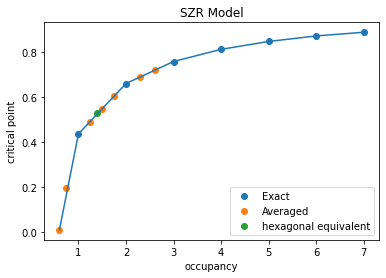

In [64]:
plt.axes(xlabel='occupancy',ylabel='critical point',title='SZR Model')
x,y=(np.arange(1,8)),[0.43699,0.66053,0.75820,0.8122243881225586,0.84717,0.87170,0.8880615234375]
plt.scatter(x,y,label='Exact')
plt.plot(np.concatenate(([0.6],x)),np.concatenate(([0.01104],y)),)
k,b=np.polyfit(x,y,1)
x=[0.6,0.743656365691809,1.25,1.5,1.75,2.3,2.6]
y=[0.01104,0.19727,0.49179,0.5459194946289063,0.6061816406249999,0.69041,0.7209374999999999 ]
plt.scatter(x,y,label='Averaged')
plt.scatter(1.4,0.5279,label='hexagonal equivalent')
plt.legend(loc='lower right')
plt.savefig('Z:/Critical_Occupancy_SZR.pdf',bbox_inches='tight')

Exact: all vertex have exactly the same degree
Averaged: the graph is created by superposition with each grid having 

The behavior might have something to do with the variance of degree distribution: A model with avg multiplicity $n$ is obtained with each site having $\lfloor n \rfloor$ or $\lceil n \rceil$ people with a weighted binary distribution.

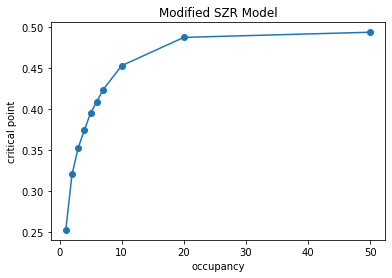

In [130]:
x,y=np.concatenate((np.arange(1,8),[10,20,50])),[0.25314453124999997,0.3207520294189453,0.3531005859375,0.375,0.39550781250000006,0.40937500000000004,0.4238037109375,0.4531005859375,0.48750,0.49375]
k,b=np.polyfit(np.log(x),y,1)
plt.axes(xlabel='occupancy',ylabel='critical point',title='Modified SZR Model')
plt.scatter(x,y)
plt.plot(x,y)
plt.savefig('Z:/Critical_Occupancy_MSZR.pdf',bbox_inches='tight')